In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
df = pd.read_csv('2018.csv')
df

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357
...,...,...,...,...,...,...,...,...,...
151,152,Yemen,3.355,0.442,1.073,0.343,0.244,0.083,0.064
152,153,Tanzania,3.303,0.455,0.991,0.381,0.481,0.270,0.097
153,154,South Sudan,3.254,0.337,0.608,0.177,0.112,0.224,0.106
154,155,Central African Republic,3.083,0.024,0.000,0.010,0.305,0.218,0.038


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB
None


In [5]:
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


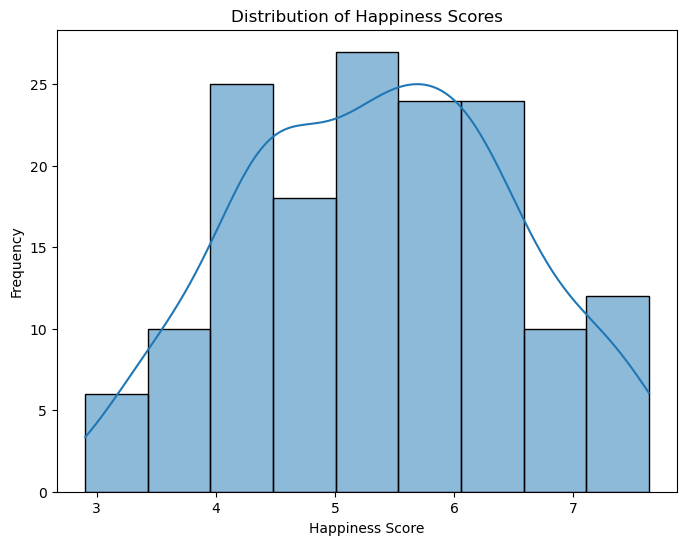

In [6]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x="Score", kde=True)
plt.title("Distribution of Happiness Scores")
plt.xlabel("Happiness Score")
plt.ylabel("Frequency")
plt.show()

In [7]:
#Happiness rankings of nations in 2018
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 
init_notebook_mode(connected=True)
data = dict(type = 'choropleth', 
           locations = df['Country or region'],
           locationmode = 'country names',
           z = df['Overall rank'], 
           text = df['Country or region'],
           colorbar = {'title':'Happiness'})
layout = dict(title = 'Global Happiness 2018', 
             geo = dict(showframe = False))
choromap3 = go.Figure(data = [data], layout=layout)
iplot(choromap3)

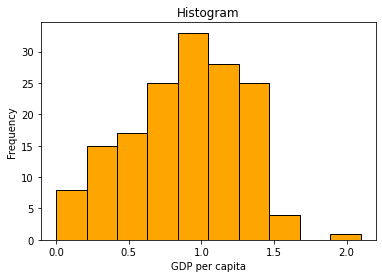

In [25]:
df['GDP per capita'].plot(kind='hist', color= 'orange', edgecolor='black')
plt.xlabel('GDP per capita')
plt.ylabel('Frequency')
plt.title('Histogram')

plt.show()

In [26]:
X = df[['GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']]
y = df['Score']


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

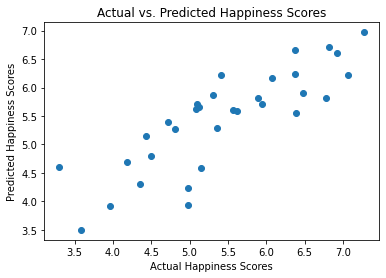

In [12]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Happiness Scores')
plt.ylabel('Predicted Happiness Scores')
plt.title('Actual vs. Predicted Happiness Scores')
plt.show()

In [13]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [14]:
threshold = sum(df.Score)/len(df.Score)
print('The average score of Happiness Index is: ',threshold)
df["Happiness Level"] = ["Happy" if i > threshold else "Unhappy" for i in df.Score]
print(df['Happiness Level'].value_counts())

The average score of Happiness Index is:  5.375916666666668
Happy      78
Unhappy    78
Name: Happiness Level, dtype: int64


In [15]:
import pandas as pd
import statsmodels.api as sm
X = df[['Overall rank', 'GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']]
y = df['Score']
X = sm.add_constant(X)
lin_reg = sm.OLS(y, X).fit()
print(lin_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     1523.
Date:                Thu, 08 Jun 2023   Prob (F-statistic):          1.84e-134
Time:                        11:03:47   Log-Likelihood:                 96.219
No. Observations:                 156   AIC:                            -176.4
Df Residuals:                     148   BIC:                            -152.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [16]:
print(df.describe())

       Overall rank       Score  GDP per capita  Social support  \
count    156.000000  156.000000      156.000000      156.000000   
mean      78.500000    5.375917        0.891449        1.213237   
std       45.177428    1.119506        0.391921        0.302372   
min        1.000000    2.905000        0.000000        0.000000   
25%       39.750000    4.453750        0.616250        1.066750   
50%       78.500000    5.378000        0.949500        1.255000   
75%      117.250000    6.168500        1.197750        1.463000   
max      156.000000    7.632000        2.096000        1.644000   

       Healthy life expectancy  Freedom to make life choices  Generosity  \
count               156.000000                    156.000000  156.000000   
mean                  0.597346                      0.454506    0.181006   
std                   0.247579                      0.162424    0.098471   
min                   0.000000                      0.000000    0.000000   
25%             

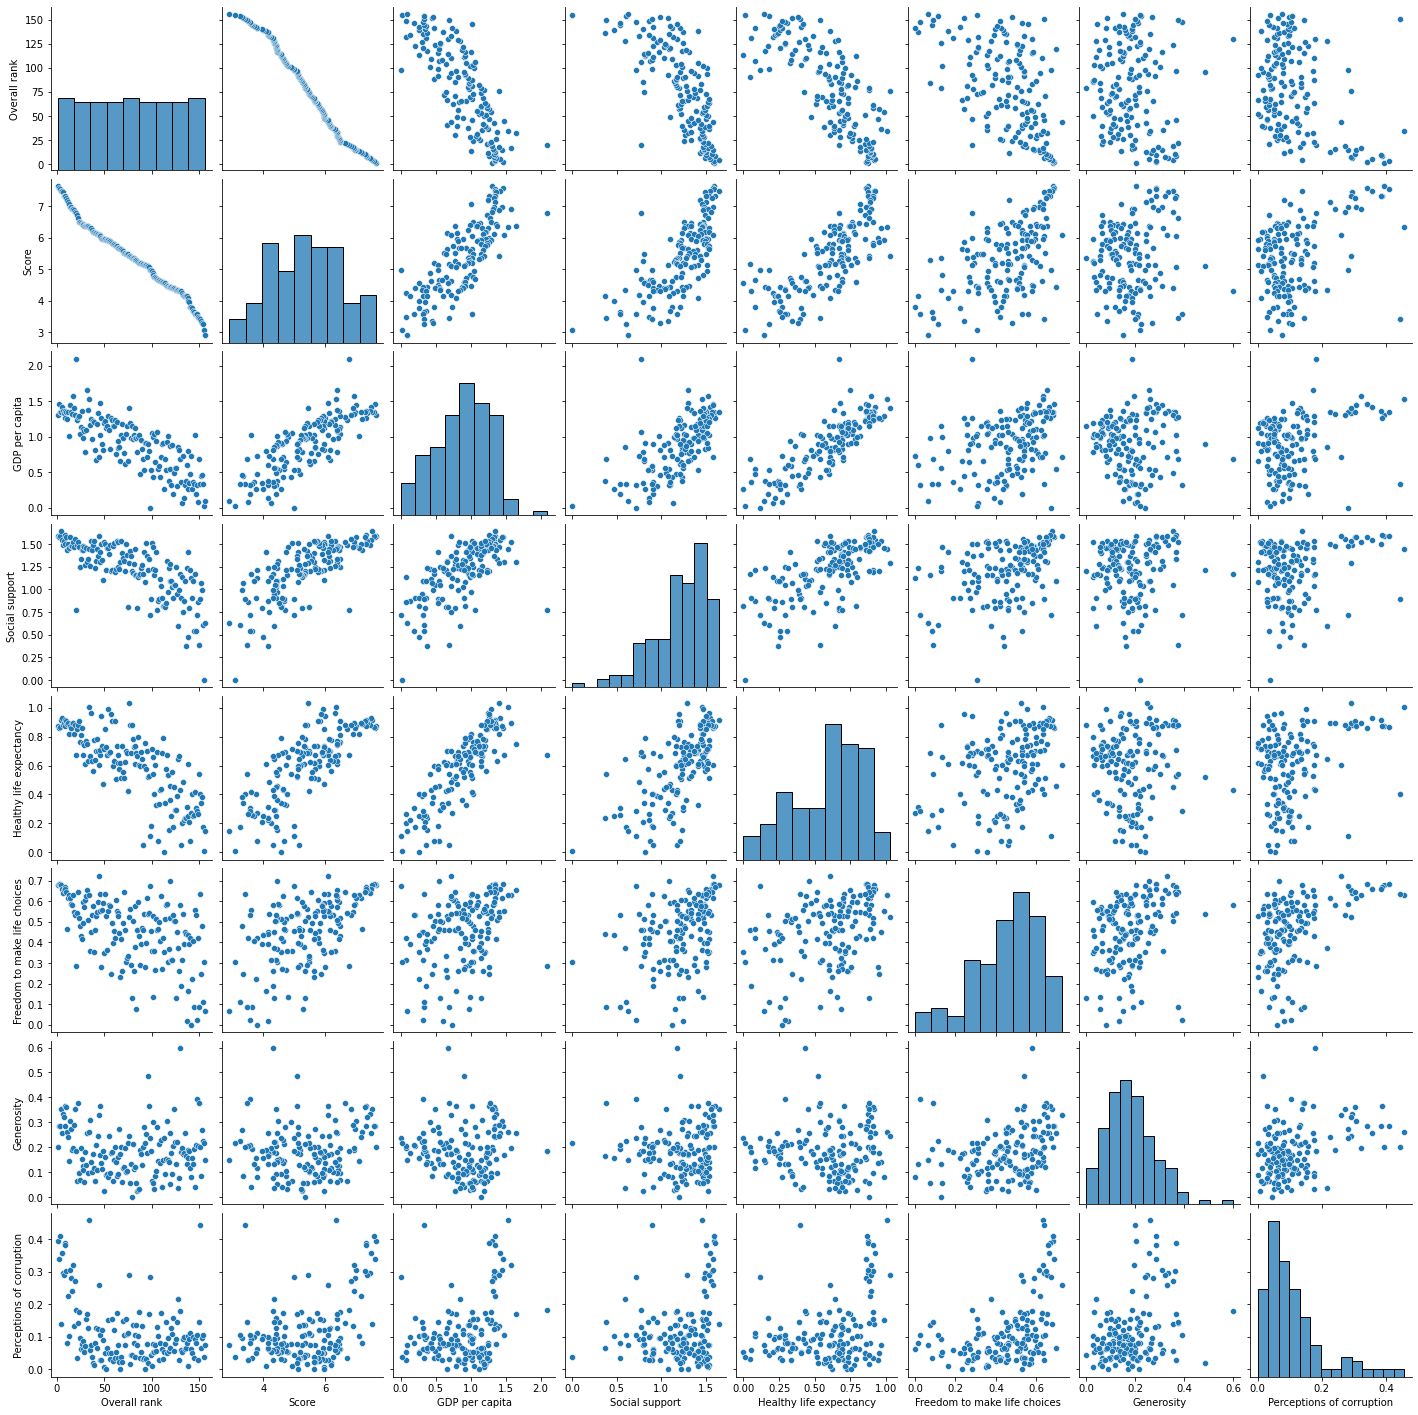

In [17]:
sns.pairplot(df)
plt.show()

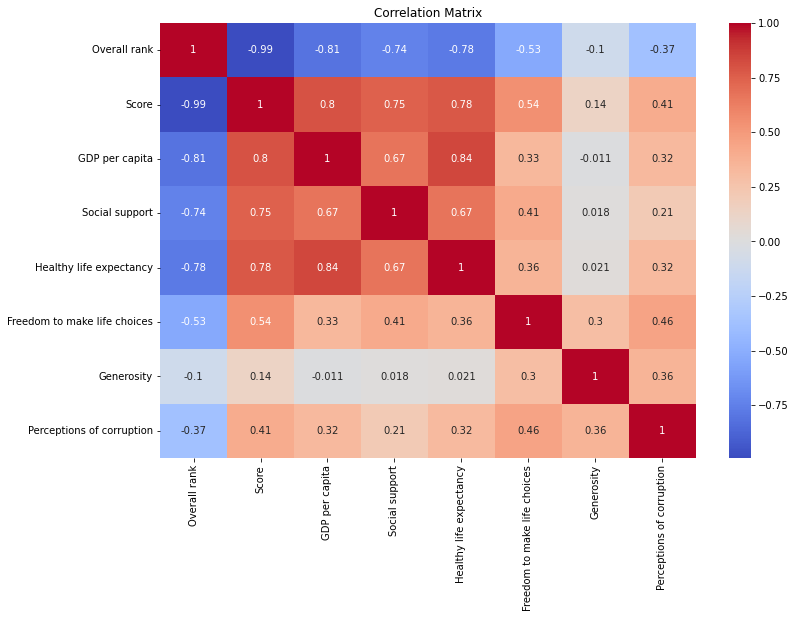

In [48]:
plt.figure(figsize =(12,8))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [49]:
threshold = sum(df.Score)/len(df.Score) #Calculates mean Score.
print('The average score of Happiness Index is: ',threshold)
df["Happiness Level"] = ["Happy" if i > threshold else "Unhappy" for i in df.Score] #Creates a new column 'Happiness Level' and specifies a condition.
print(df['Happiness Level'].value_counts())

The average score of Happiness Index is:  5.375916666666668
Happy      78
Unhappy    78
Name: Happiness Level, dtype: int64


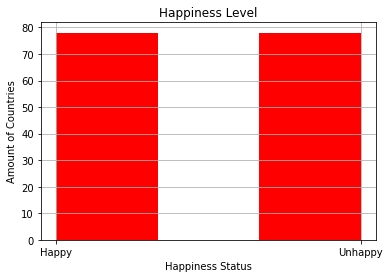

In [50]:
plt.hist(df['Happiness Level'], bins = 3,color = 'red')
plt.grid()
plt.title('Happiness Level')
plt.xlabel('Happiness Status')
plt.ylabel('Amount of Countries')
plt.show()

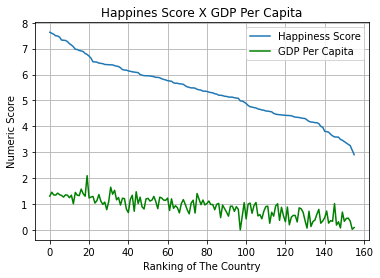

In [51]:
df['Score'].plot(kind = 'line', label = 'Happiness Score')
df['GDP per capita'].plot(kind = 'line', label = 'GDP Per Capita', color = 'green')
plt.grid()
plt.legend(loc = 'upper right')
plt.xlabel('Ranking of The Country')
plt.ylabel('Numeric Score')
plt.title('Happines Score X GDP Per Capita')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

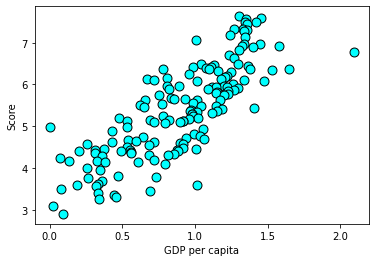

In [52]:
df.plot(kind = 'scatter', color = 'aqua', s = 80, edgecolor = 'black', x = 'GDP per capita', y = 'Score')
plt.show

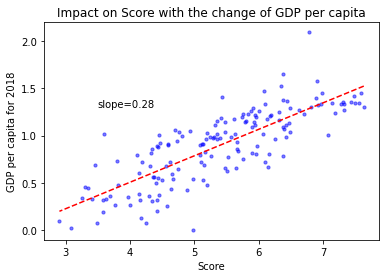

In [53]:
plt.scatter(df['Score'], df['GDP per capita'], s=10, c='blue', alpha=0.5)
z = np.polyfit(df['Score'], df['GDP per capita'], 1)
p = np.poly1d(z)
plt.plot(df['Score'], p(df['Score']), "r--")
plt.annotate("slope={:.2f}".format(z[0]), xy=(3.5, 1.3), xytext=(3.5, 1.3))
plt.title("Impact on Score with the change of GDP per capita")
plt.xlabel("Score")
plt.ylabel("GDP per capita for 2018")
plt.show()

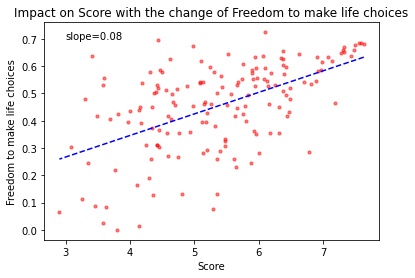

In [54]:
plt.scatter(df['Score'], df['Freedom to make life choices'], s=10, c='red', alpha=0.5)
z = np.polyfit(df['Score'], df['Freedom to make life choices'], 1)
p = np.poly1d(z)
plt.plot(df['Score'], p(df['Score']), "b--")
plt.annotate("slope={:.2f}".format(z[0]), xy=(3, 0.7), xytext=(3, 0.7))
plt.title("Impact on Score with the change of Freedom to make life choices")
plt.xlabel("Score")
plt.ylabel("Freedom to make life choices")
plt.show()